<a href="https://colab.research.google.com/github/robinsk8a/Artificial_Intelligence_Robin01/blob/main/Bourke_YT_PyToch_Curse/01_PyTorch_workflow_curse.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PyTorch workflow

In [54]:
import torch
from torch import nn # nn contains all of PyTorch's building blocks for neural networks
import numpy as np
import matplotlib.pyplot as plt

#check PyTorch version
torch.__version__

'1.13.1+cu116'

## 1. Data (preparing and loading)
### Data can be anythinf in ML, like spread sheets, images, audios...

Our main objetive with the data that we have is to **get the data into a numerical representation** and then **build a model that detects patterns** base on that numerical representations

## Linear Regression formula:

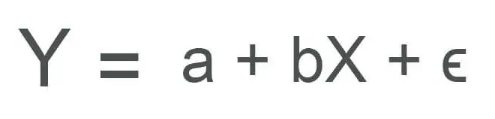

In [36]:
# Let's create some known data using the linear regression formula
weight = 0.7 # In the LR formula this variable would be "b"
bias = 0.3   # In the LR formula this variable would be "a"

# We want to create a model that allow us to estimate these two prior numbers
# We can do this by looking at different examples
# Let's first define a range
start = 0
end = 1
step = 0.02
# The we define 2 tensors (or it's fundation) 'X' and 'Y'
X = torch.arange(start, end, step).unsqueeze(dim=1)
Y = weight * X + bias


In [37]:
X[:10], Y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]), tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [38]:
len(X), len(Y)

(50, 50)

### Splitting data into training and test sets

In [39]:
# We creat a train set with the 80% of our data
train_split = int(0.8 * len(X))
X_train, Y_train = X[:train_split], Y[:train_split]
X_test, Y_test = X[train_split:], Y[train_split:]
len(X_train), len(Y_train), len(X_test), len(Y_test)

(40, 40, 10, 10)

## Visualize data

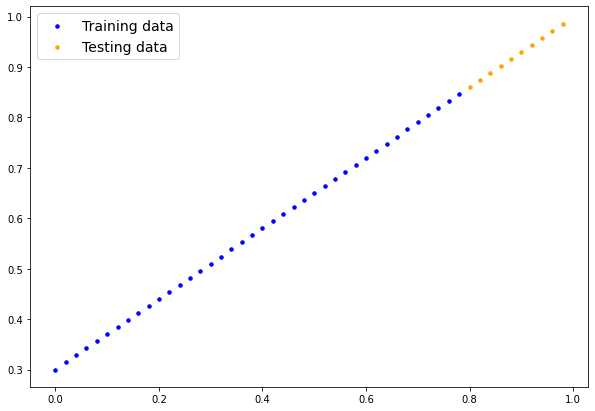

In [40]:
def plot_predictions(train_data = X_train,
                     train_labels = Y_train,
                     test_data = X_test,
                     test_labels = Y_test,
                     predictions = None):
  s=12
  plt.figure(figsize=(10, 7))
  # plot training data
  plt.scatter(train_data, train_labels, c="b", s=s, label="Training data")

  # plot test data
  plt.scatter(test_data, test_labels, c="orange", s=s, label="Testing data")

  # are there predictions
  if predictions is not None:
    # plot the predictions
    plt.scatter(test_data, predictions, c="g", s=s, label= "Predictions")
  # show the legend
  plt.legend(prop={"size": 14})

plot_predictions()

# Building our first model

In [41]:
# First we create a linear regression model class
class LinearRegressionModel(nn.Module): # nn is like the lego building bricks of PyTorch module
  def __init__(self):
    super().__init__()
    self.weights = nn.Parameter(torch.randn(1,
                                            requires_grad=True,
                                            dtype=torch.float))
    self.bias = nn.Parameter(torch.randn(1,
                                         requires_grad=True,
                                         dtype=torch.float))
    
    # Forward method to define the computation in the model
  def forward(self, x: torch.Tensor) -> torch.Tensor: # "x" is the input data
    return self.weights * x + self.bias # This is the linear regression formula

### PyTorch building models essentials
\
* torch.nn - have all the building blocks for computational graphs (Neural networks an more)
* torch.nn.Parameter - What parameters should out model try and learn
* torch.nn.Module - The base class for all our neural network functions. If we make it a subclass then we need to overwrite the forward function
* torch.optim - this is where we find the optimizers, these will help us with gradient descent
* def forward() - All nn.Module subclasses require us to overwrite forward. This function defines what happend in the forward computation

In [42]:
# We can check out our model parameters using the module ".parameters()"
# Now we create a random seed for reproducibility
torch.manual_seed(42)

# now we create an instance of the model we created previously (a subclass of nn.Module)
model_0 = LinearRegressionModel()

#checking out the parameters
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True), Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [43]:
# List named parameters
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

## First predictons

In [44]:
# Making predictions using torch.inferene_mode()
with torch.inference_mode():
  y_preds = model_0(X_test)

y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

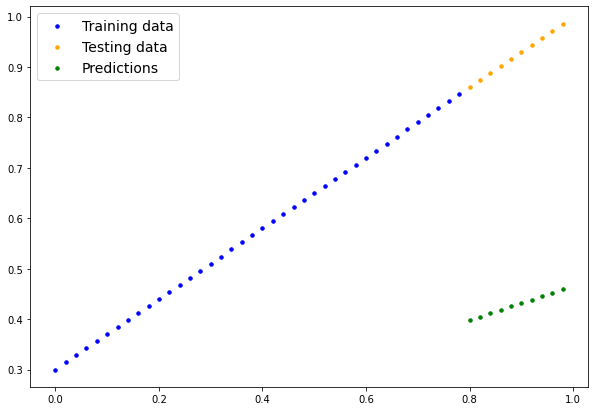

In [45]:
plot_predictions(predictions=y_preds)

## Training model

In [46]:
# Setup the loss function
loss_fn = nn.L1Loss()

# Setup optimizer (Stochastic gradient decent)
optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.01)

In [47]:
loss_fn

L1Loss()

### Building a traning loop

In [56]:
torch.manual_seed(42)
# An epoch is one loop through the data
epochs = 200

# Track values
epoch_count= []
loss_values=[]
test_loss_values= []

# 0. loop through the data

for epoch in range(epochs):
  # set the model to training mode
  model_0.train() # taing mode in PyTorch sets all parameters that requires gradients to require gradients
  
  # 1. Forward pass
  y_pred = model_0(X_train)

  # 2. Calculate the loss
  loss= loss_fn(y_pred, Y_train)

  # 3, Optimizer zero grad
  optimizer.zero_grad()

  # 4. Perform Backpropagation on the loss with respec to the parameters of the model
  loss.backward()

  # 5. Step the optimizer (perform gradient decent)
  optimizer.step() # Bi default how the optimizer will accumulate through the loop so... we have to zero them above in step 3 for the next iteration of the loop

  model_0.eval() # Turns off several functions on the code that are not needed for testing porpouse
  with torch.inference_mode(): # This turns off gradient tracking
  
    # 1. Forward pass
    test_pred = model_0(X_test)

    # 2. Calculate the test loss
    test_loss = loss_fn(test_pred, Y_test)

  if epoch % 10 == 0:

    epoch_count.append(epoch)
    loss_values.append(loss)
    test_loss_values.append(test_loss)

    print(f"Epoch: {epoch} | Loss: {loss} | Test loss: {test_loss}")
    
    # Printing the model state dict
    print(model_0.state_dict())


Epoch: 0 | Loss: 0.008932482451200485 | Test loss: 0.005023092031478882
OrderedDict([('weights', tensor([0.6951])), ('bias', tensor([0.2993]))])
Epoch: 10 | Loss: 0.008932482451200485 | Test loss: 0.005023092031478882
OrderedDict([('weights', tensor([0.6951])), ('bias', tensor([0.2993]))])
Epoch: 20 | Loss: 0.008932482451200485 | Test loss: 0.005023092031478882
OrderedDict([('weights', tensor([0.6951])), ('bias', tensor([0.2993]))])
Epoch: 30 | Loss: 0.008932482451200485 | Test loss: 0.005023092031478882
OrderedDict([('weights', tensor([0.6951])), ('bias', tensor([0.2993]))])
Epoch: 40 | Loss: 0.008932482451200485 | Test loss: 0.005023092031478882
OrderedDict([('weights', tensor([0.6951])), ('bias', tensor([0.2993]))])
Epoch: 50 | Loss: 0.008932482451200485 | Test loss: 0.005023092031478882
OrderedDict([('weights', tensor([0.6951])), ('bias', tensor([0.2993]))])
Epoch: 60 | Loss: 0.008932482451200485 | Test loss: 0.005023092031478882
OrderedDict([('weights', tensor([0.6951])), ('bias',

### Loss curve

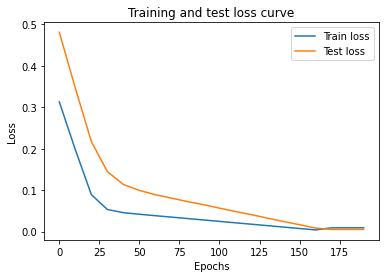

In [55]:
# Plot the loss curve
plt.plot(epoch_count, np.array(torch.tensor(loss_values).numpy()), label="Train loss")
plt.plot(epoch_count, test_loss_values, label= "Test loss")
plt.title("Training and test loss curve")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend()

In [49]:
with torch.inference_mode():
  y_preds_new = model_0(X_test)

In [50]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

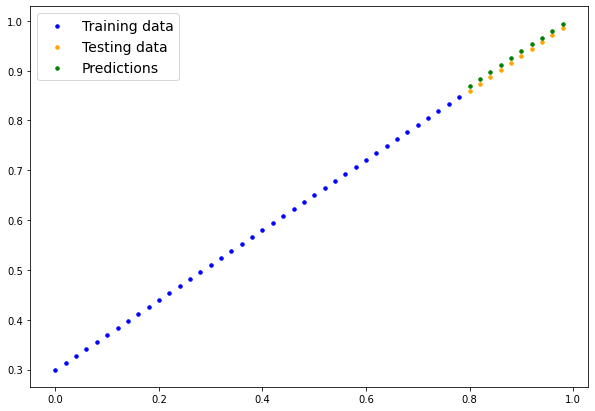

In [51]:
plot_predictions(predictions=y_preds_new)

## Saving a model in PyTorch
\
We have 3 principal method to save a model...

* `torch.save()` - Allow us to save a PyTorch object in a pickle format
* `torch.load()` - Allow us to load a saved PyTorch object
* `torch.nn.Module.load_state_dict()` - Allow us to load a model's saved state dictionary (`model.state_dict()`)

In [60]:
from IPython.utils import path
# Saving our PyTorch module
from pathlib import Path

# 1. Create a model directory
MODEL_PATH= Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2. Create a model save path
MODEL_NAME= "DB_YT_Curse_Model_0.pth"
MODEL_SAVE_PATH= MODEL_PATH / MODEL_NAME

# 3. Save the model state dict
print(f"Saving the model in: {MODEL_SAVE_PATH}")
torch.save(obj=model_0.state_dict(), f=MODEL_SAVE_PATH)

Saving the model in: models/DB_YT_Curse_Model_0.pth


In [61]:
!ls -l models

total 4
-rw-r--r-- 1 root root 1111 Feb 16 15:18 DB_YT_Curse_Model_0.pth


### Loading our PyTorch model

In [63]:
# We instantiate our class so we can load our new model
loaded_model_0= LinearRegressionModel()

# This time we start again with random numbers...
loaded_model_0.state_dict()

OrderedDict([('weights', tensor([0.2345])), ('bias', tensor([0.2303]))])

In [64]:
# We load the saved state_dict() of our model_0
loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

# But when we load our file from the predefine path, we update the saved state_dict that we saved before
loaded_model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [65]:
# Making some predictions with our loaded model
loaded_model_0.eval()
with torch.inference_mode():
  loaded_model_0_preds= loaded_model_0(X_test)

loaded_model_0_preds

tensor([[0.8685],
        [0.8825],
        [0.8965],
        [0.9105],
        [0.9245],
        [0.9384],
        [0.9524],
        [0.9664],
        [0.9804],
        [0.9944]])

In [67]:
# Compare loaded_model_preds with the original preds
loaded_model_0.eval()
with torch.inference_mode():
  y_preds= model_0(X_test)

y_preds == loaded_model_0_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])